# Unpacking Simulations Part1 Data
11/25/20

In [21]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import scipy.stats as stats
import astropy.units as u
import os
from glob import glob

# create paths
png_path = "/home/shawn/Desktop/galaxy_sim/visuals/png/"
pdf_path = '/home/shawn/Desktop/galaxy_sim/visuals/pdf/'
csv_path = '/home/shawn/Desktop/galaxy_sim/files/csv/'

In [22]:
# create path to specific data for sim1
sim1 = f'{csv_path}simulations_part1/'
run1 = f'{sim1}part25000_steps25000_mean010_rot010/'
run1_pos = f'{run1}pos/'

-14683.675649 8162.480544 7234.717856
-14683.299764 8162.778131 7234.200108
-14682.923661 8163.075602 7233.682261
-14676.116390000001 8168.410181 7224.344179000001


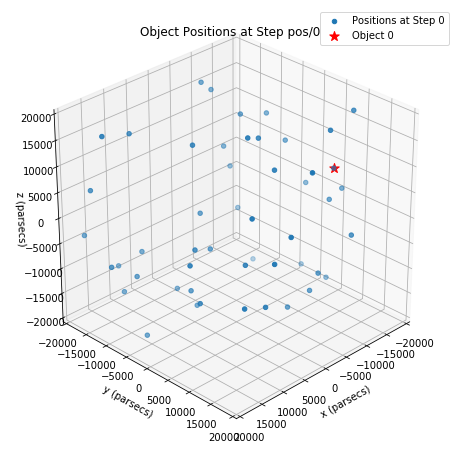

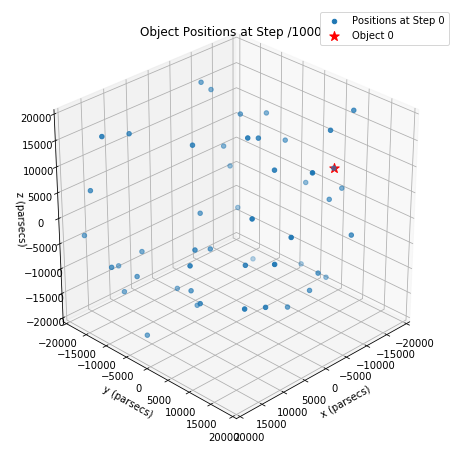

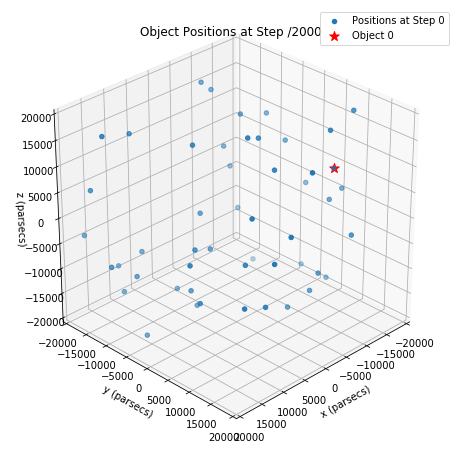

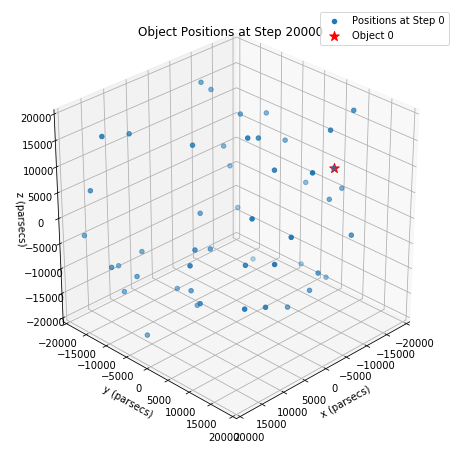

In [23]:
# function for loading and plotting

def plot_step_positions(csv_file_name):
    # load csv
    data = pd.read_csv(f'{csv_file_name}.csv')
    x0 = data.pos_x[0]
    y0 = data.pos_y[0]
    z0 = data.pos_z[0]
    x = data.pos_x.iloc[0:50]
    y = data.pos_y.iloc[0:50]
    z = data.pos_z.iloc[0:50]
    c = data.particle
    print(x0, y0, z0)
    
    # create 3-d plot
    fig = plt.figure(figsize=(8,8));
    ax = plt.axes(projection='3d');
    #ax.plot_surface(X=X, Y=y, Z=z, color='k', alpha=0.4)
    ax.scatter3D(xs=x, ys=y, zs=z, #c=c,
          label='Positions at Step 0',
          #cmap = "Greens"
                );
    ax.scatter3D(xs=x0, ys=y0, zs=z0,
                color='r',
                 marker='*',
                 s=100,
                label='Object 0');
    ax.set_xlabel('x (parsecs)');
    ax.set_ylabel('y (parsecs)');
    ax.set_zlabel('z (parsecs)');
    ax.set_xlim(-20000,20000)
    ax.set_ylim(-20000,20000)
    ax.set_zlim(-20000,20000)
    ax.legend();
    ax.set_title(f'Object Positions at Step {csv_file_name[-5:]}');
    ax.view_init(30, 45);
    #plt.show();
    
plot_step_positions(f'{run1_pos}0')
plot_step_positions(f'{run1_pos}1000')
plot_step_positions(f'{run1_pos}2000')
plot_step_positions(f'{run1_pos}20000')

In [26]:
def load_all_csv_files (directory, num_bodies):
    
    PATH = directory
    EXT = "*.csv"
    all_csv_files = [file
                     for path, subdir, files in os.walk(PATH)
                     for file in glob(os.path.join(path, EXT))]
    
    data = np.zeros( (len(all_csv_files), num_bodies, 4) )
    for i, file in enumerate(all_csv_files):
        csv = pd.read_csv(f'{file}')
        data[i] = csv  
    return(data)

In [27]:
def plot_all_epochs_positions(run):
    for epoch in range(len(run)):
        x0 = run[epoch, 0,  1] # take first particle  
        y0 = run[epoch, 0,  2] 
        z0 = run[epoch, 0,  3] 
        x = run[epoch, :100,  1] # take first 100 particles
        y = run[epoch, :100,  2]
        z =run[epoch, :100,  3]
    
        # create 3-d plot
        fig = plt.figure(figsize=(8,8));
        ax = plt.axes(projection='3d');
        #ax.plot_surface(X=X, Y=y, Z=z, color='k', alpha=0.4)
        ax.scatter3D(xs=x, ys=y, zs=z, #c=c,
              label='Positions',
              #cmap = "Greens"
                    );
        ax.scatter3D(xs=x0, ys=y0, zs=z0,
                    color='r',
                     marker='*',
                     s=100,
                    label='Object 0');
        ax.set_xlabel('x (parsecs)');
        ax.set_ylabel('y (parsecs)');
        ax.set_zlabel('z (parsecs)');
        ax.set_xlim(-20000,20000)
        ax.set_ylim(-20000,20000)
        ax.set_zlim(-20000,20000)
        ax.legend();
        ax.set_title(f'Object Positions at Epoch {epoch}');
        ax.view_init(30, 45);
        #plt.show();

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


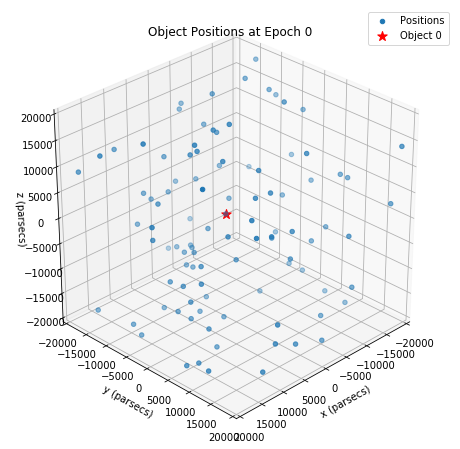

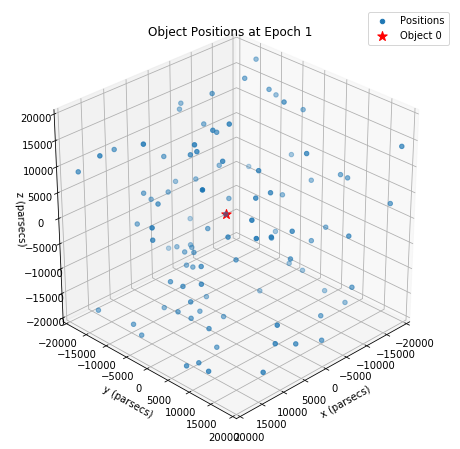

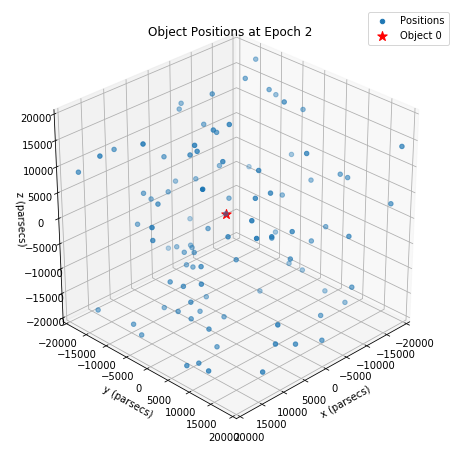

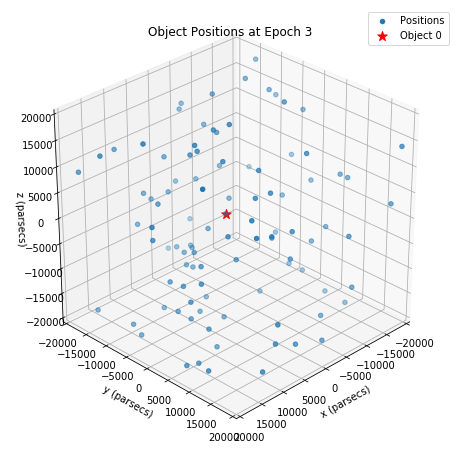

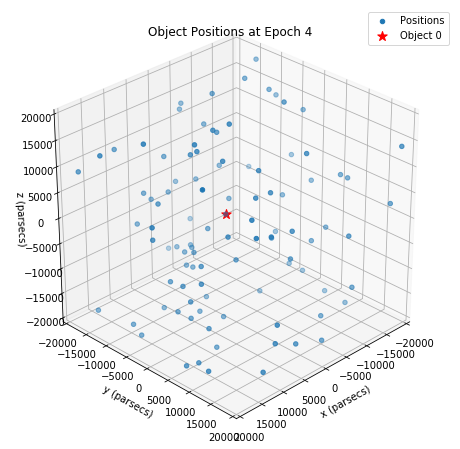

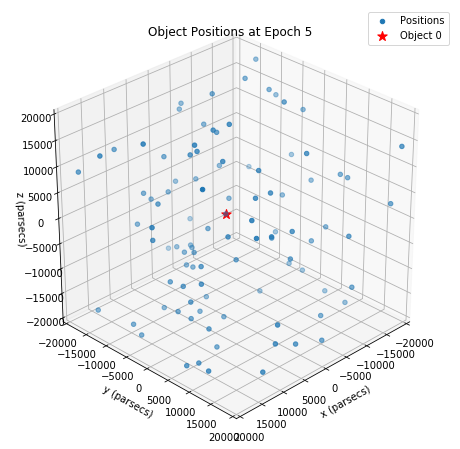

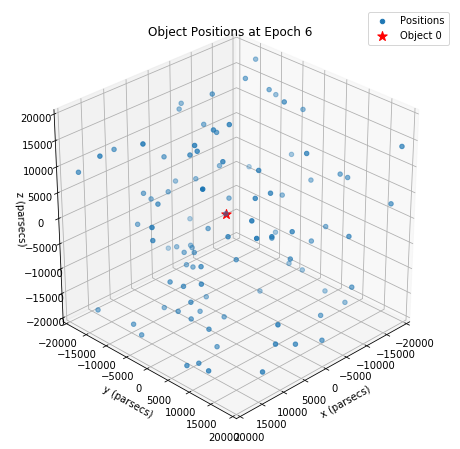

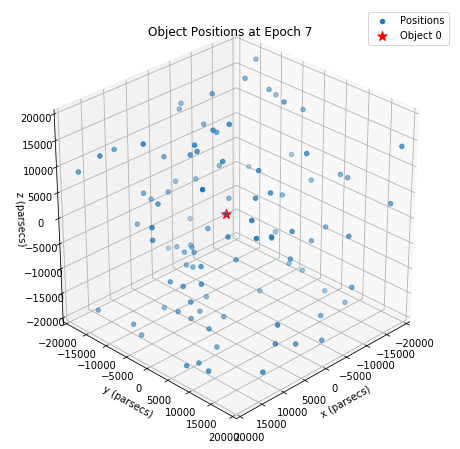

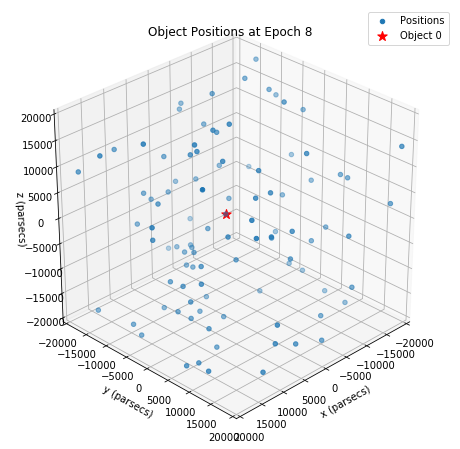

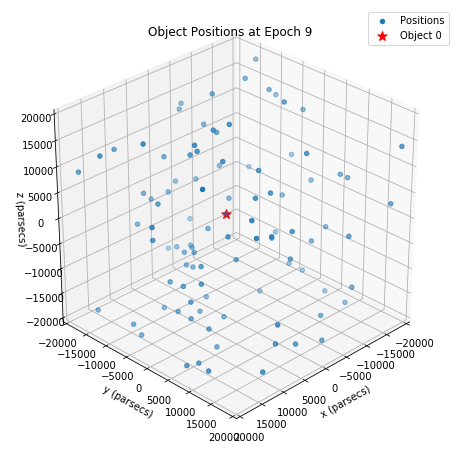

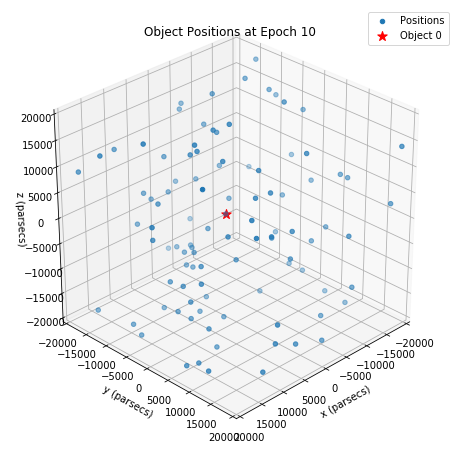

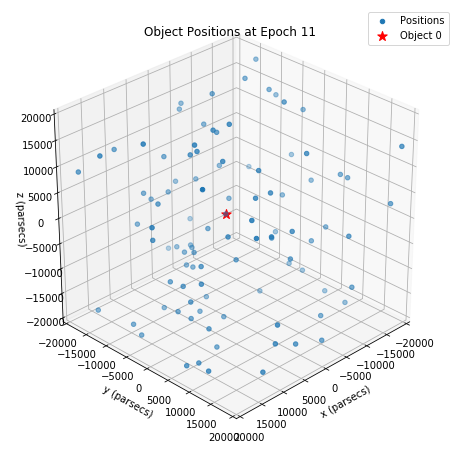

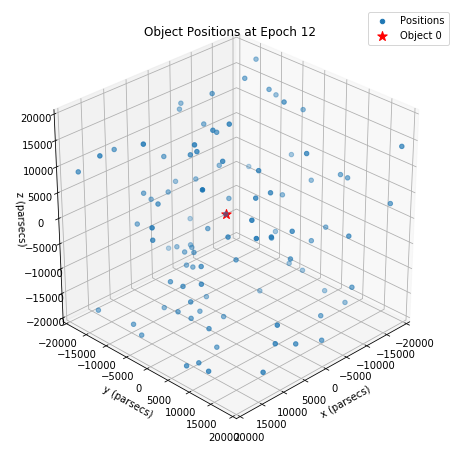

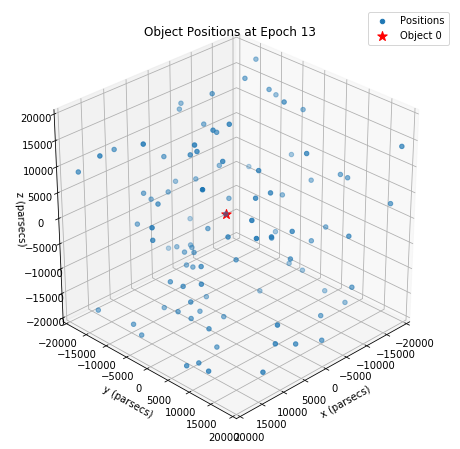

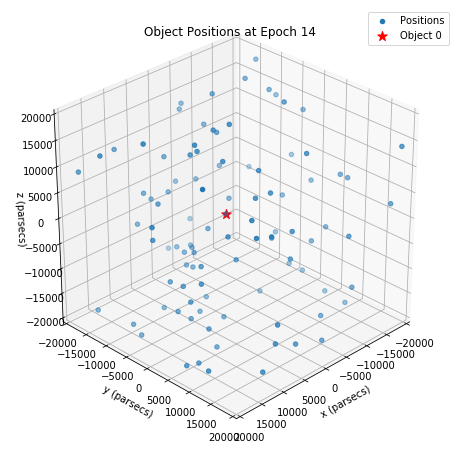

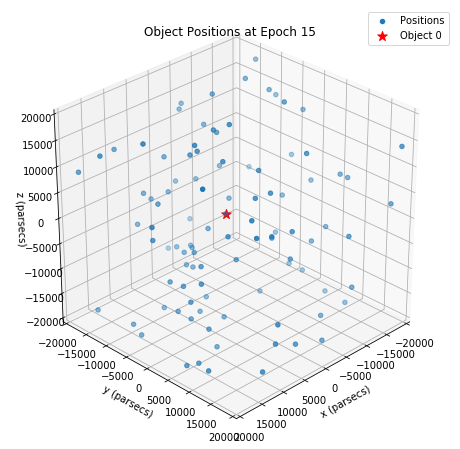

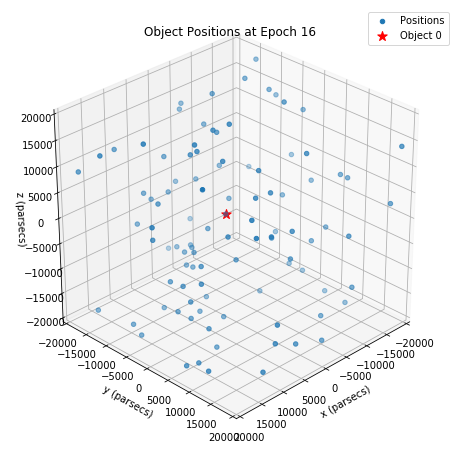

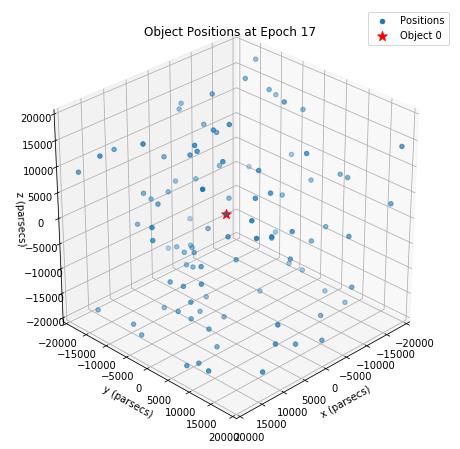

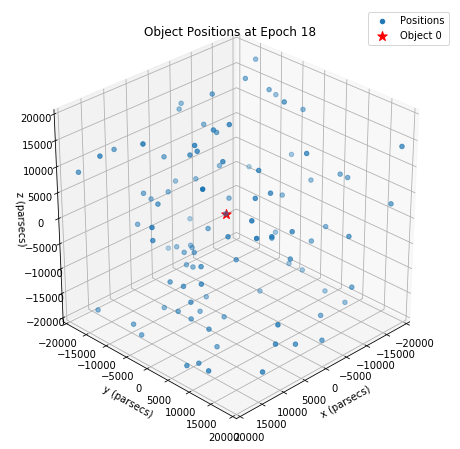

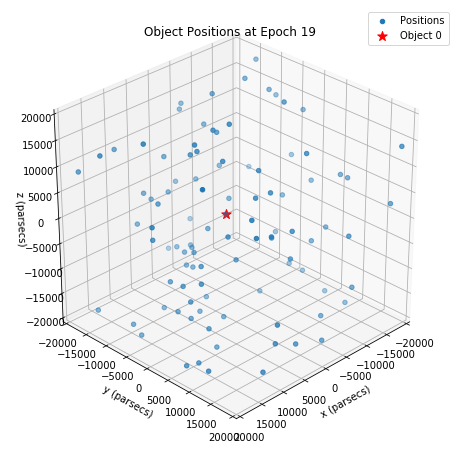

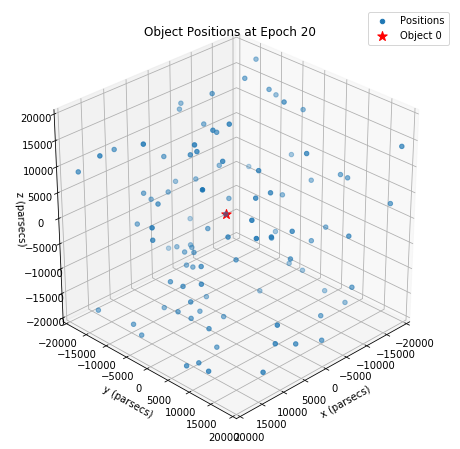

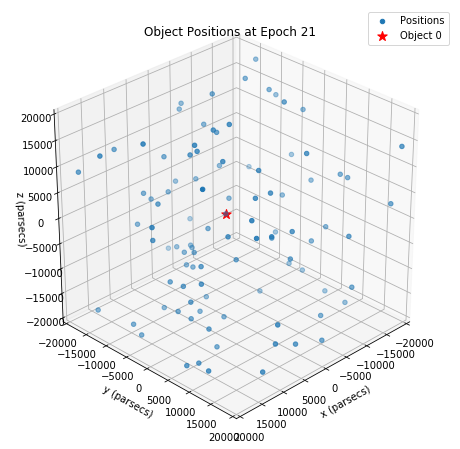

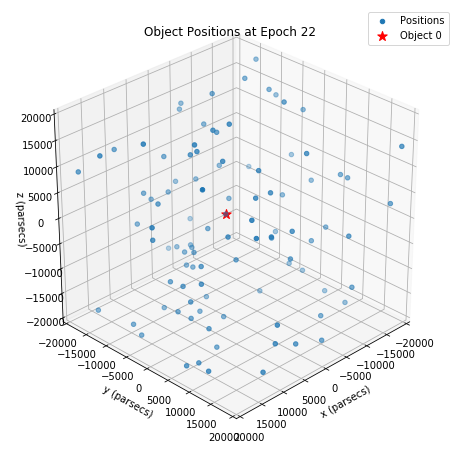

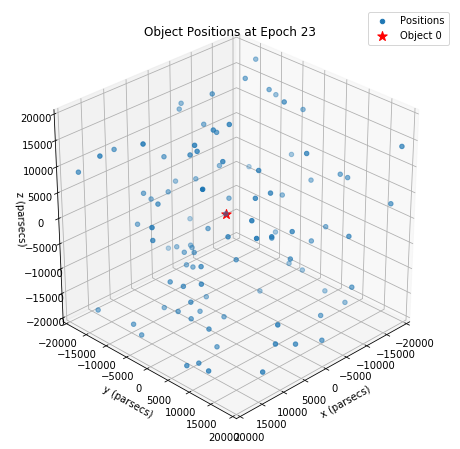

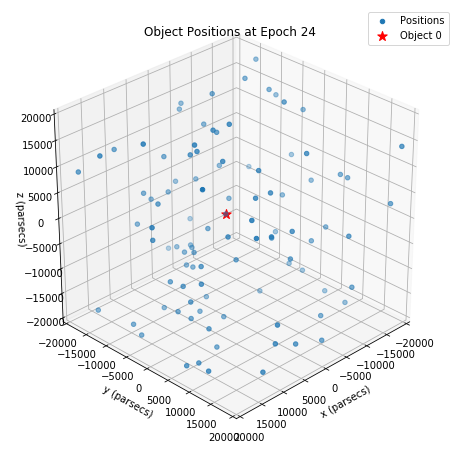

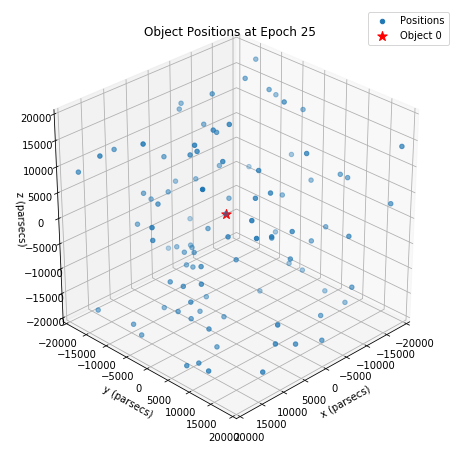

In [43]:
# run1 didn't seem to show a whole lot, so I'm looking to the fastest one to be sure our
# sim is even doing what it's supposed to
run = f'{sim1}part25000_steps25000_mean050_rot030/'
run_pos = f'{run}pos/'

run_data = load_all_csv_files(run_pos, 25000)
plot_all_epochs_positions(run_data)


# There doesn't appear to be much motion over the entire run.
# Look at Energy

In [67]:
# read in csvs total_ke.csv and total_pe.csv
run_pe = pd.read_csv(f'{run}total_pe.csv')
run_ke = pd.read_csv(f'{run}total_ke.csv')
run_pe.columns

Index(['step', 'total_pe'], dtype='object')

(135484708710.0258, 135485101762.72043)

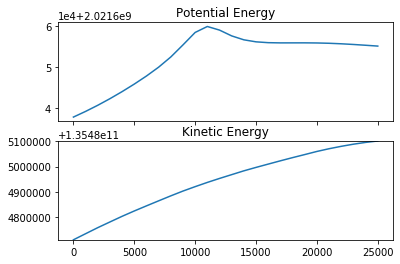

In [106]:
# plot
step = run_pe['step']
pe = run_pe['total_pe']
ke = run_ke['total_ke']

fig, axs = plt.subplots(2, sharex=True)
axs[0].set_autoscale_on(False)
axs[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axs[0].set_title('Potential Energy')
axs[0].set_ylim(np.min(pe)-10**3, np.max(pe)+10**3)
axs[0].plot(step, pe)
axs[1].plot(step, ke)
axs[1].set_title('Kinetic Energy')
axs[1].set_ylim(np.min(ke), np.max(ke))
#axs[1].set_ylim(0, 10)